In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", 
                   skip = 19, col_names=FALSE) 
colnames(data) <- c("age", "sex", "chest_pain_type", "resting_blood_pres", "cholesteral", "fasting_blood_sugar < 120", "resting_ecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "number_of_vessels_colored", "thal", "healthy_or_sick", "sickness_classifier")








── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)



In [3]:
print(data)
glimpse(data)

# A tibble: 303 × 15
     age sex   chest_pain_type resting_blood_pres cholesteral `fasting_blood_s…`
   <dbl> <chr> <chr>                        <dbl>       <dbl> <chr>             
 1    63 male  angina                         145         233 true              
 2    67 male  asympt                         160         286 fal               
 3    67 male  asympt                         120         229 fal               
 4    37 male  notang                         130         250 fal               
 5    41 fem   abnang                         130         204 fal               
 6    56 male  abnang                         120         236 fal               
 7    62 fem   asympt                         140         268 fal               
 8    57 fem   asympt                         120         354 fal               
 9    63 male  asympt                         130         254 fal               
10    53 male  asympt                         140         203 true              
# … wit

In [4]:
data_vessels <- data |>
    select(number_of_vessels_colored, healthy_or_sick)
data_vessels <- mutate(data_vessels, number_of_vessels_colored = as.numeric(number_of_vessels_colored))



data_vessels

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


number_of_vessels_colored,healthy_or_sick
<dbl>,<chr>
0,buff
3,sick
2,sick
0,buff
0,buff
0,buff
2,sick
0,buff
1,sick


Warning message:
“Removed 5 rows containing non-finite values (stat_count).”
Warning message:
“Removed 5 rows containing non-finite values (stat_count).”


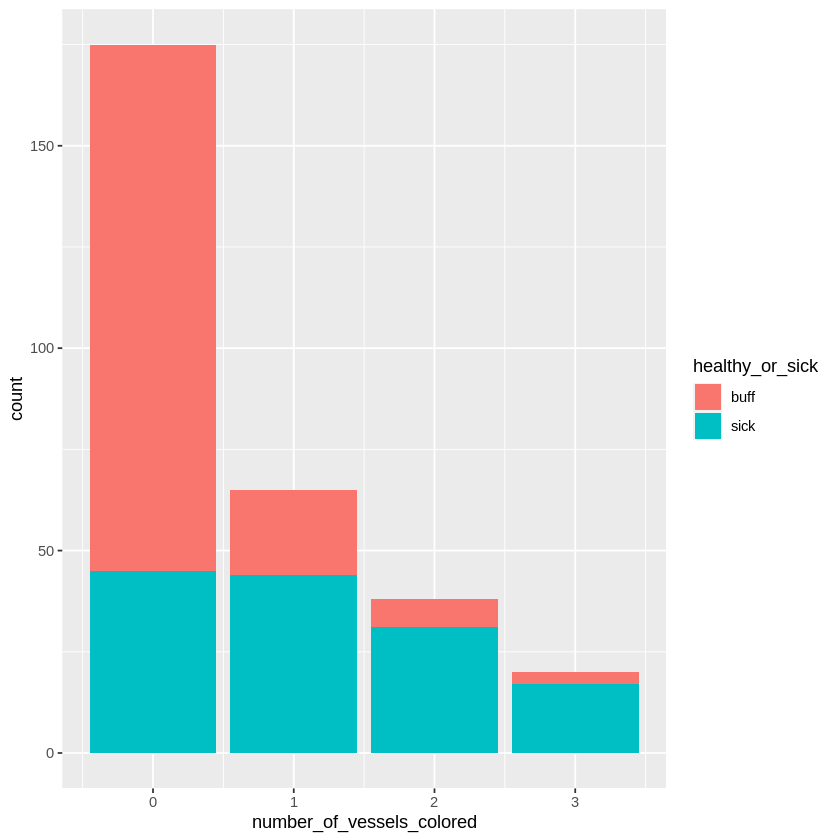

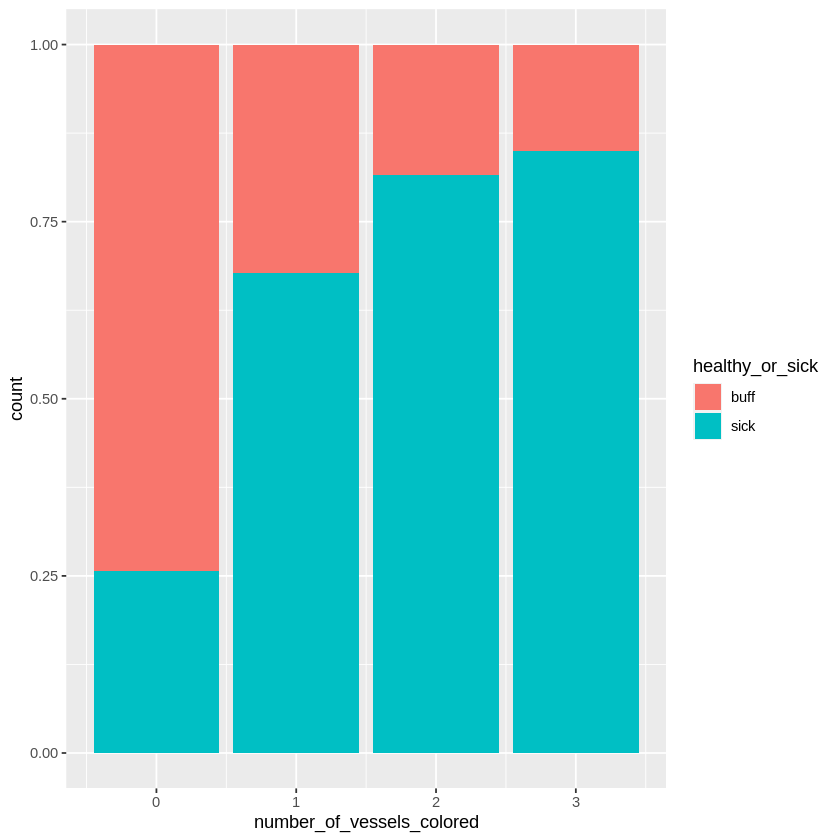

In [6]:
data_vessels_plot1 <- data_vessels |>
    ggplot(aes(x = number_of_vessels_colored, fill = healthy_or_sick)) +
    geom_bar()

data_vessels_plot1

data_vessels_plot2 <- data_vessels |>
    ggplot(aes(x = number_of_vessels_colored, fill = healthy_or_sick)) +
    geom_bar(position = "fill")

data_vessels_plot2

data_vessels_plot2 <- data_vessels |>
    ggplot(aes(x = number_of_vessels_colored, fill = healthy_or_sick)) +
    geom_bar(position = "fill")

data_vessels_plot2